In [1]:
# Initially tried importing with just numpy but ran into errors with the fifth order
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

female200 = pd.read_csv("../female200.csv", header=None)
x = np.vstack((female200[0] - 1948) / 4 + 1)
t = np.vstack(female200[1])
_x = x*4+1944
plt.figure()
plt.plot(_x,t,'ro')

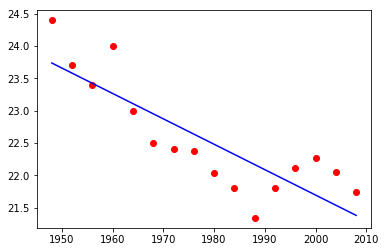

In [2]:
order = 1
X = np.ones_like(x)
for a in range(1,order+1):
    X = np.hstack((X,x**a))
w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,t))
testt = np.dot(X,w)
plt.figure()
plt.plot(_x,t,'ro')
plt.plot(_x,testt,'b')

In [3]:
# Squared error for linear
# y = w0 + w1*x1
diff = list()
for a in range(0, x.size):
    difference = t[a] - testt[a]
    diff.append(difference**2)
square_diff = sum(diff)/x.size
print("3rd Order Loss:",square_diff)

3rd Order Loss: [0.21367695]


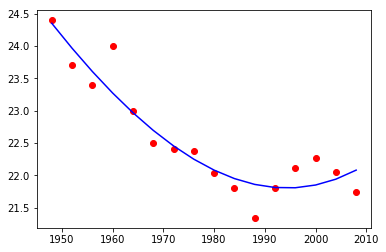

In [4]:
# Third order polynomial
order = 3
X = np.ones_like(x)
for a in range(1,order+1):
    X = np.hstack((X,x**a))
w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,t))
testt3 = np.dot(X,w)
plt.figure()
plt.plot(_x,t,'ro')
plt.plot(_x,testt3,'b')

In [5]:
# Squared error for third order 
# y = w0 + w1*x^1 + w2*x^2 + w3*x^3
diff3 = list()
for a in range(0, x.size):
    difference = t[a] - testt3[a]
    diff3.append(difference**2)
square_diff3 = sum(diff3)/x.size
print("3rd Order Loss:",square_diff3)

3rd Order Loss: [0.08717867]


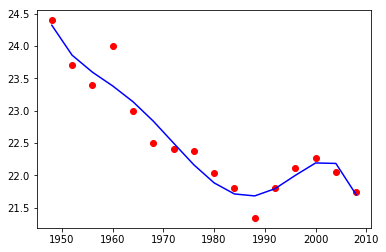

In [6]:
order = 5
X = np.ones_like(x)
for i in range(1,order+1):
    X = np.hstack((X,x**i))
w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,t))
testt5 = np.dot(X,w)
plt.figure()
plt.plot(_x,t,'ro')
plt.plot(_x,testt5,'b')

In [7]:
# Squared error for fifth order 
# y = w0 + w1*x^1 + w2*x^2 + w3*x^3 + w4*x^5 + w5*x^5
diff5 = list()
for a in range(0, x.size):
    difference = t[a] - testt5[a]
    diff5.append(difference**2)
square_diff5 = sum(diff5)/x.size
print("5th Order Loss:",square_diff5)
# MSE of      Linear: 0.21367695
# MSE of Third Order: 0.08717868
# MSE of Fifth Order: 0.05161528

5th Order Loss: [0.05161528]


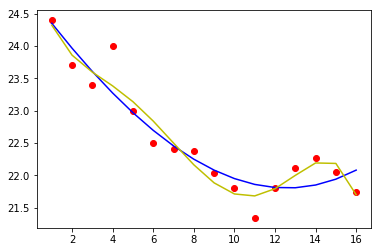

In [8]:
plt.plot(x, t, 'ro')
plt.plot(x,testt3,'b')
plt.plot(x,testt5,'y')
# From the naked eye, they both appear to be the same line
# From the MSE's, fifth order is the best fit line. 0.05 < 0.087

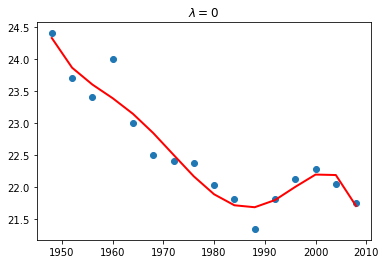

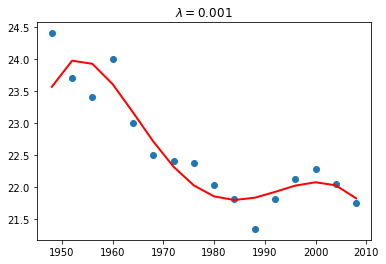

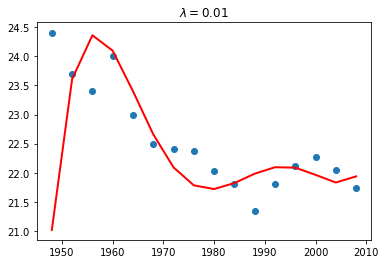

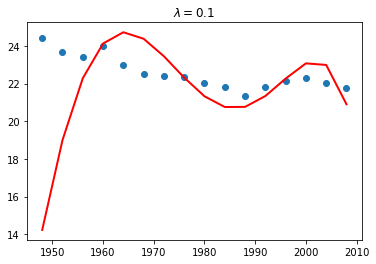

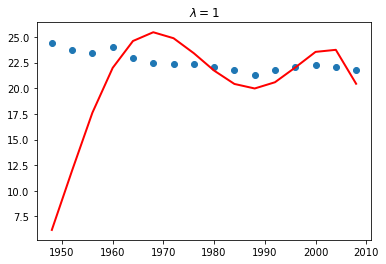

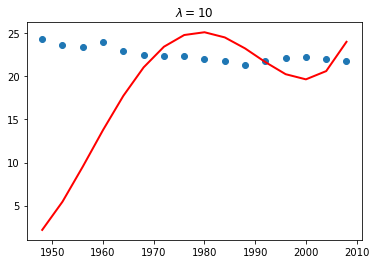

In [9]:
# Using L2 regularization
order = 5
x_test = np.linspace(1,16,16)[:,None]
X = np.ones_like(x)
X_test = np.ones_like(x_test)
for i in range(1,order+1):
    X = np.hstack((X,x**i))
    X_test = np.hstack((X_test,x_test**i))
for lamb in [0,0.001,0.01,0.1,1,10]:
    Lambloss = 0
    w = np.linalg.solve(np.dot(X.T,X) + x.size*lamb*np.identity(order+1),np.dot(X.T,t))
    f_test = np.dot(X,w)
    fX_test = np.dot(X_test,w)
    plt.figure()
    plt.scatter(_x,t)
    plt.plot(_x,fX_test,'r-',linewidth=2)
    title = '$\lambda=$%g'%lamb
    plt.title(title)
    
# Lambda = 0 fits the data best.